<a href="https://colab.research.google.com/github/MERVISMAS12/Plant-Disease-Detection-using-VGG-19/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle
#install Kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload() #Load kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mervismascarenhas","key":"8b712b4eb082f374bdce012c197a4b4d"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# ! kaggle datasets list #NOT NECESSARY

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset #DOWNLOADING DATASET ZIP FILE

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:29<00:00, 175MB/s]
100% 2.70G/2.70G [00:29<00:00, 97.8MB/s]


In [ ]:
! unzip new-plant-diseases-dataset.zip #UNZIPPING ZIP FILE

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
!pip install keras
!pip install --upgrade keras tensorflow


In [ ]:
import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
import tensorflow

from tensorflow.keras.utils import img_to_array ,load_img

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip= True, preprocessing_function= preprocess_input) #PROCESSING TRAINING IMAGE

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input) #PROCESSING VALID OUTPUT


In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size = (256,256),batch_size=32)


val = val_datagen.flow_from_directory(directory = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size = (256,256),batch_size=32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = next(train)
#t_img , label = train.next()

In [ ]:
def plotImage(img_arr, label):

  for im , l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

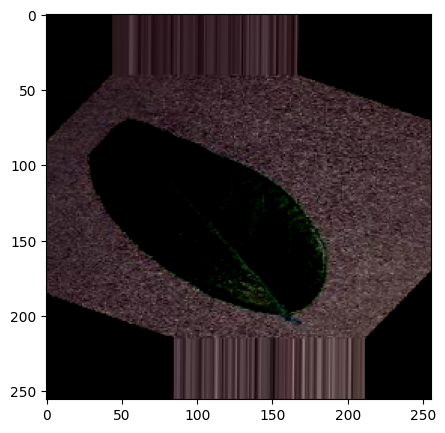

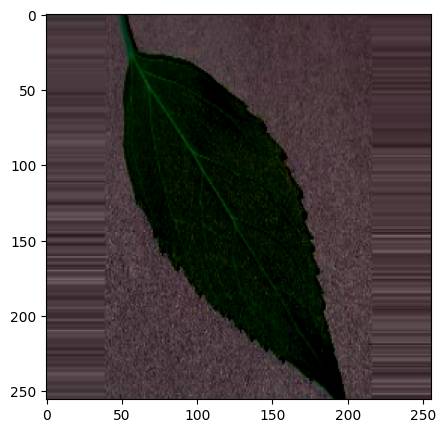

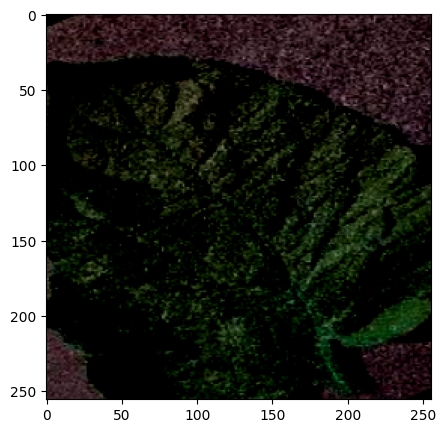

In [ ]:
plotImage(t_img[:3], label[:3])

Building the model

In [ ]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape = (256,256, 3), include_top = False)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
X = Flatten()(base_model.output)

X = Dense (units = 38,activation = 'softmax')(X)


In [ ]:
model = Model(base_model.input ,X) #STORING MODEL IN A VAR MODEL

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,269,606 (81.14 MB)

 Trainable params: 1,245,222 (4.75 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Early stopping and model check point

In [ ]:
from keras.callbacks import ModelCheckpoint , EarlyStopping
es = EarlyStopping(monitor = 'val_accuracy',min_delta= 0.01, patience = 3, verbose =1)
mc = ModelCheckpoint(filepath= "best_model.keras",monitor = 'val_accuracy', verbose = 1, save_best_only = True)
# from keras.callbacks import ModelCheckpoint, EarlyStopping

# # EarlyStopping configuration
# es = EarlyStopping(
#     monitor='val_accuracy',
#     min_delta=0.01,
#     patience=3,
#     verbose=1
# )

# # ModelCheckpoint configuration (without min_delta)
# mc = ModelCheckpoint(
#     filepath="best_model.h5",
#     monitor='val_accuracy',
#     verbose=1,
#     save_best_only=True
# )

In [ ]:
cb = [es,mc]

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])

In [ ]:
his = model.fit(train , steps_per_epoch =16, epochs = 50, verbose = 1, callbacks =cb , validation_data= val, validation_steps =16) #TRAINING MODEL

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.0796 - loss: 29.4880
Epoch 1: val_accuracy improved from -inf to 0.36133, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 867ms/step - accuracy: 0.0843 - loss: 29.3881 - val_accuracy: 0.3613 - val_loss: 15.9485
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.3896 - loss: 17.5811
Epoch 2: val_accuracy improved from 0.36133 to 0.50781, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 742ms/step - accuracy: 0.3916 - loss: 17.4907 - val_accuracy: 0.5078 - val_loss: 12.8892
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.4851 - loss: 11.8063
Epoch 3: val_accuracy improved from 0.50781 to 0.58008, saving model to best_model.keras
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 792ms/step - accuracy: 0.4846 - loss: 11.8228 - val_accuracy: 0.5801 - val_loss: 9.3658
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.5228 - loss: 10.8061
Epoch 4: val_accuracy improved from 0.58

In [ ]:
h = his.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

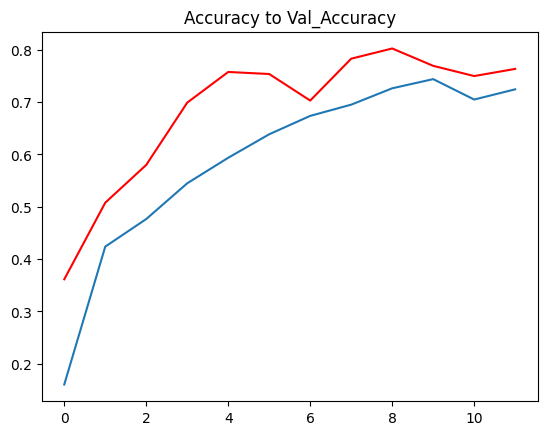

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("Accuracy to Val_Accuracy")
plt.show() #ACCURACY GRAPH

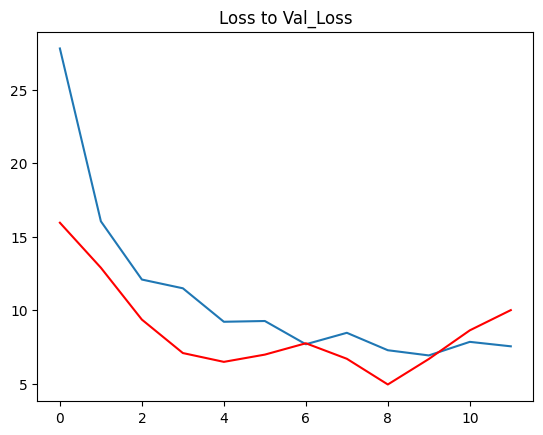

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("Loss to Val_Loss")
plt.show() #DATA LOSS GRAPH

In [ ]:
#load best model

from keras.models import load_model

model = load_model("/content/best_model.keras")

In [ ]:
acc = model.evaluate(val)[1]

print(f"The accuracy of this model is  = {acc*100} %")

550/550 ━━━━━━━━━━━━━━━━━━━━ 124s 224ms/step - accuracy: 0.7935 - loss: 5.2493
The accuracy of this model is  = 79.46164608001709 %


In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys()))) #STORING ALL THE DISEASES USING KEYS AND VALUES IN THE VAR REF (FOR EX. 1. DISEASE NAME)

In [ ]:
def prediction(path):
  img = load_img(path, target_size= (256,256)) #LOADING IMAGE + PROCESSING IT IN SIZE 256*256

  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im,axis=0)

  #print(img.shape)

  pred = np.argmax(model.predict(img))

  return f"The image belongs to { ref[pred] } " # REFERING THE REF DICT TO FIND THE NAME OF DISEASE


In [ ]:
!pip install inference_sdk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.8 MB/s eta 0:00:00


In [ ]:
path = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus/036662aa-5a39-4e1a-adc7-32017654d0ef___YLCV_GCREC 2463.JPG"

from inference_sdk import InferenceHTTPClient

CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="A4KDjfnhlLtIl2fyB5rw"
)

result = CLIENT.infer(path, model_id="plants-diseases-detection-and-classification/12")
result

{'inference_id': '8b312aad-c9e4-4f49-8c67-dde6bc38e853',
 'time': 0.09756947999994736,
 'image': {'width': 256, 'height': 256},
 'predictions': [{'x': 94.0,
   'y': 96.5,
   'width': 178.0,
   'height': 185.0,
   'confidence': 0.8115320801734924,
   'class': 'Tomato leaf yellow virus',
   'class_id': 23,
   'detection_id': 'dfb0018e-f230-473d-b9b6-d971a177667a'}]}

In [ ]:
!pip install Pillow matplotlib

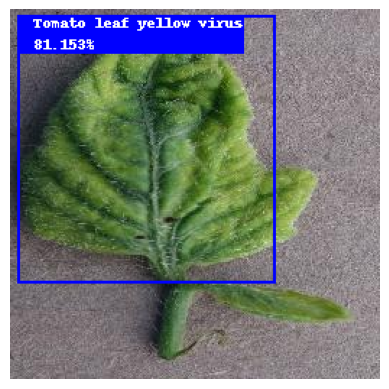

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the image
img = Image.open(path)

# Get the predictions from the inference result
predictions = result['predictions']

# Create a drawing context
draw = ImageDraw.Draw(img)

# Load a font
try:
    font = ImageFont.truetype("arial.ttf", 16)
except IOError:
    font = ImageFont.load_default()

# Draw the bounding box and class label on the image
for pred in predictions:
    x, y = pred['x'], pred['y']
    width, height = pred['width'], pred['height']
    label = "  " + pred['class'] + '\n' + "  " + str(round(pred['confidence']*100, 3)) + '%'
    left = x - width / 2
    top = y - height / 2
    right = x + width / 2
    bottom = y + height / 2

    # Draw bounding box
    draw.rectangle([left, top, right, bottom], outline="blue", width=2)

    # Get text size using textbbox
    text_bbox = draw.textbbox((left, top - height / 2), label, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]

    # Adjust text position to ensure visibility
    text_x = left # 2 pixels padding
    text_y = top # + text_height / 10  # 2 pixels padding

    # Draw label background
    draw.rectangle([text_x, text_y, text_x + text_width, text_y + text_height], fill="blue")

    # Draw label text
    draw.text((text_x, text_y), label, fill="white", font=font)

# Display the image with bounding box and label
plt.imshow(img)
plt.axis('off') # Hide the axis
plt.show()

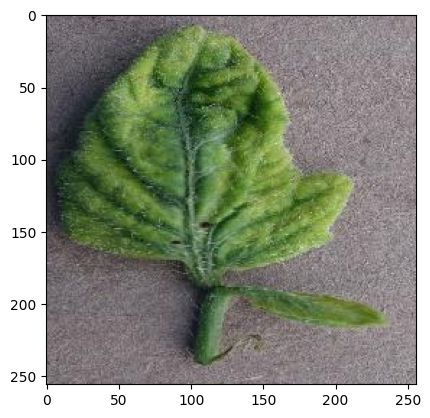

In [ ]:
inp = Image.open(path)
plt.imshow(inp)

In [ ]:
import matplotlib.image as mpimg

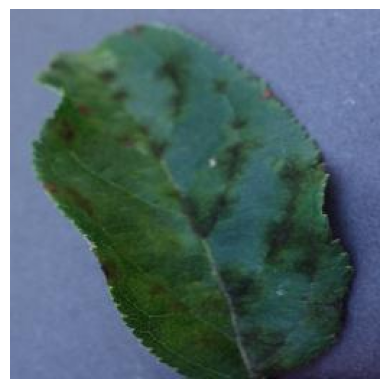

In [ ]:
image = mpimg.imread(path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes for a better view of the image
plt.show()

In [ ]:
# Pip install method (recommended)
%pip install ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
import os
import csv
import tensorflow as tf
import keras as keras
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import shutil
import squarify
import cv2
import matplotlib.image as mpimg
import seaborn as sns
import sklearn
import ultralytics
from sklearn.model_selection import train_test_split
from ultralytics import YOLO

sns.set_style('darkgrid')

%matplotlib inline

ModuleNotFoundError: No module named 'squarify'

In [ ]:
# Reproducibility
random_seed = 42
random.seed(random_seed)

# Show versions of the imported libraries
pd.DataFrame({
    'Library': ['ultralytics','tensorflow','keras','csv','cv2','pandas','matplotlib','sklearn','sns'],
    'Version': [ultralytics.__version__,tf.__version__,keras.__version__,csv.__version__,cv2.__version__,pd.__version__,matplotlib.__version__,sklearn.__version__,sns.__version__]
})

In [ ]:
# loading library
import pickle
# create an iterator object with write permission - model.pkl
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)


In [ ]:
!pip install gradio #install gradio


In [ ]:
import gradio as gr

with gr.Blocks(theme=gr.themes.Glass()) as demo:
    path = gr.inputs.Image(type="filepath")
    output = gr.Textbox(label="Output Box", type="text")
    pred_btn = gr.Button("Detect Diseased Leave")
    pred_btn.click(fn=prediction, inputs=path, outputs=output, api_name="prediction")

demo.launch(share=True)